## 내가 바꾸고 싶었던 것은 작디작은 큐빗 하나였단다.
### Pauli X 게이트 정복하기
#### 제작자: 박수연-Cameron (Sueon) Park, 2021 || me.sueonpark@gmail.com

컴퓨터는 이진 신호로 이루어집니다. 0과 1의 무수한 흐름들이 컴퓨터의 작동 뿐만 아니라 고급 데이터인 음악, 이미지, 영상들도 만들어냅니다.
여기서 궁금한 것이 생기지 않나요? 0에서 1로, 1에서 0으로 바꾸는 그 제어기는 어떻게 생겼을까요? 제어기의 이름은 무엇이며, 어떻게 작동시키는 것일까요?

고전 컴퓨터에서는 이를 ``NOT 게이트``라고 부릅니다. 원본 데이터를 부정한다고 생각하시면 됩니다. 컴퓨터가 읽을 수 있는 뜻은 0과 1 뿐이니까요.
이대로만 고집해도 괜찮을까요?

스무고개를 떠올려 봅시다. 스무고개를 할 때는 어떠한 질문에 '예' 또는 '아니오'로만 답할 수 있습니다. 말그대로 스무고개입니다. 답을 찾는 데 상당한 시간이 소요됩니다.

컴퓨터도 마찬가지입니다. 디지털 신호는 간단하고 회로도 설계가 편하다는 이점이 있으나 고전 컴퓨터의 한계를 만드는 데 한몫했습니다. 그것을 뛰어넘고자 발명된 것이 바로 ``양자 컴퓨터``이므로, 지금부터 이 노트북과 함께 양자 컴퓨팅에서의 NOT 게이트인, __Pauli X Gate__ 에 대해 알아봅시다.

In [2]:
## 기본 중의 기본, qiskit을 구동시키기 위해 필요한 라이브러리들을 import합시다.
!pip install qiskit
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [29]:
# Qubit(큐빗) 하나짜리 Quantum Register를 만듭시다.
qr = QuantumRegister(1) # 하단의 그림에서 줄 하나짜리 qubit 회로입니다.

# 전형적인 레지스터(Classical Register) 하나를 만듭시다. 비트 하나짜리입니다. (0과 1)
cr = ClassicalRegister(1) # 하단의 그림에서 줄 두 개짜리 bit 회로입니다.

# Quantum Register 하나, Classical Register 하나를 가지고 양자 회로를 만듭니다.
circ = QuantumCircuit(qr, cr)

In [30]:
# 큐빗 회로에 파울리 X 게이트를 얹어 봅시다!
circ.x(qr[0])

In [31]:
# Classical Register를 사용해 큐빗의 상태를 측정해 봅시다.
circ.measure(qr, cr)

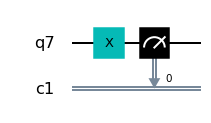

In [32]:
# 회로를 그려 봅시다.
circ.draw(output='mpl')

자, 이 큐빗은 0이 나왔습니다. 0 큐빗은 2차원 벡터로 나타낼 수 있습니다. __0 큐빗 축은 1을, 1 큐빗 축은 0을 가리키는 상태가 바로 0 큐빗(  $\vert0\rangle$  )입니다.__

$$
 \begin{bmatrix}
  1 \\
  0
 \end{bmatrix}
$$

In [35]:
# 이제 회로를 시뮬레이션하고 작동시킬 때가 왔습니다. 또한 필요한 모듈을 import합시다.
from qiskit import BasicAer

# 백엔드를 설정합시다.
backend_sim = BasicAer.get_backend('qasm_simulator') # 여기서는 BasicAer의 qasm_simulator를 이용하려 합니다.

# 회로를 작동시켜 봅시다!
job_sim = execute(circ, backend_sim, shots=100) # 이 회로를 100번 실행합니다. 실행하는 횟수를 shot이라고 합니다.

# 여기서는 BasicAer'의 qasm_simulator를 사용합니다.
backend_sim = BasicAer.get_backend('qasm_simulator')

# qasm_simulator에서 회로를 100번 돌립니다. 그 횟수를 'shot'이라고 부릅니다.
job_sim = execute(circ, backend_sim, shots=100)

In [36]:
# 결과를 끌어냅니다.
result_sim = job_sim.result()

# 파이톤 딕셔너리 형태로 저장되어 있을 결과들을 끌어냅니다. 결과는 키로, 결과가 나온 횟수는 데이터로 저장되어 있습니다.
counts = result_sim.get_counts(circ)
print(counts)

{'1': 100}


##### 0 큐빗을 X 게이트에 통과시켰더니 1 큐빗(  $\vert1\rangle$  )이 나왔습니다!
100번 돌렸더니 100번 다 1이 나왔습니다. 0에서 1이 되고, 0에서 1이 되고, 0에서 1이 되고, ...... 이 과정을 100번 거쳤다고 생각하면 됩니다. 반대로만 바꿔주는 게이트는 천 번을 돌리든 만 번을 돌리든 0 큐빗은 1 큐빗이 될 것입니다.

이 백발백중의 기적을 히스토그램으로 그려 봅시다.

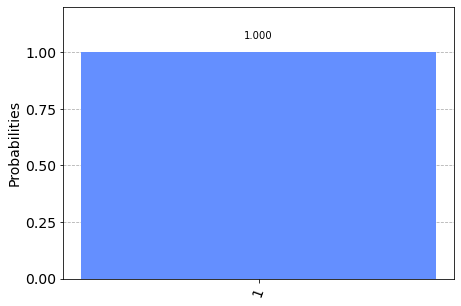

In [37]:
# 필요한 모듈 import하기
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

Pauli X Gate도 뒤집기를 잘 하는데, 저희도 거꾸로 생각해 봅시다. 0 큐빗이 X 게이트를 두 번 통과하면 어떻게 될까요?

프로그래밍은 상상과 생각의 조화라 생각합니다. 0 큐빗이 X 게이트를 한 번 통과하자 1 큐빗이 되었습니다. 그런 상황에서 다시 뒤집는다면?

**정답입니다!** 다시 0 큐빗이 됩니다.

In [7]:
# 큐빗 2개짜리 Quantum Register를 만들어 봅시다.
qreg_q = QuantumRegister(2, 'q')

# 이번에는 그에 상응하는 Classical Register를 만들어 봅시다. 비트가 2개여야 합니다.
creg_c = ClassicalRegister(2, 'c')

# 회로를 만듭시다.
circuit = QuantumCircuit(qreg_q, creg_c)

# 2번째 Quantum Register에 X 게이트를 하나 얹어 주세요. '주의' 인간에게 2번째이면 컴퓨터에게는 몇 인덱스일까요?
circuit.x(qreg_q[1])

# X 게이트가 놓인 곳에서 측정해 봅시다. 
circuit.measure(qreg_q[1], creg_c[1])

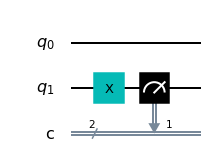

In [8]:
# 회로를 그려 봅시다.
circuit.draw(output='mpl')

자, 이 큐빗은 1이 나왔습니다. 1 큐빗도 2차원 벡터로 나타낼 수 있습니다. __0 큐빗 축은 0을, 1 큐빗 축은 1을 가리키는 상태가 바로 1 큐빗(  $\vert1\rangle$  )입니다.__

$$
 \begin{bmatrix}
  0 \\
  1
 \end{bmatrix}
$$

첫 번째(컴퓨터에게는 0번째) Quantum Register은 0 큐빗입니다. 반면, X 게이트가 놓인 곳은 방금 측정했다시피 1 큐빗이 나옵니다.
그리하여 이 회로가 나타내는 큐빗은 현재 '01' 상태입니다.

이제 이 결과를 뒤집어 볼까요?

In [11]:
# 필요한 모듈 import하기
from qiskit import BasicAer

# 위와 동일하게 BasicAer의 qasm_simulator를 사용해 주세요.
backend_sim1 = BasicAer.get_backend('qasm_simulator')

# 회로를 100번 실행해 볼까요?
job_sim1 = execute(circuit, backend_sim1, shots=100)

# 결과를 가져오세요.
result_sim1 = job_sim1.result()

# 측정 결과가 담긴 딕셔너리를 출력하세요.
counts1 = result_sim1.get_counts(circuit)
print(counts1)

{'10': 100}


'01' 큐빗들이 '10'이 되었습니다!

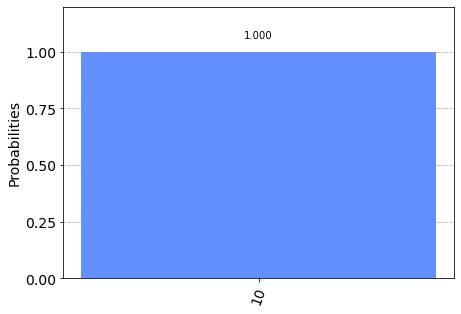

In [14]:
# 필요한 모듈 import하기
from qiskit.tools.visualization import plot_histogram

# 위와 동일하게 이번 회로에 대한 히스토그램을 그려 주세요.
plot_histogram(counts1)

예상했던 결과가 역시 백발백중으로 나오는군요.

선형대수학을 배우셨다면 눈치채셨을 수 있습니다. 위에서 0 큐빗과 1 큐빗을 2차원 벡터로 나타내 보았던 것, 기억나시나요? 그렇다면 파울리 X 게이트를 벡터화하면 어떻게 바꿀 수 있을까요?

__행렬곱__ 연산을 떠올리면 간단합니다.

$$
 \begin{bmatrix}
  0 & 1 \\
  1 & 0
 \end{bmatrix}
$$

이게 바로 파울리 X 게이트입니다. 행렬곱 연산을 수행해 봅시다. 먼저 0 큐빗부터!

$$
\begin{bmatrix}
  0 & 1 \\
  1 & 0
 \end{bmatrix}.
 \begin{bmatrix}
  1 \\
  0
 \end{bmatrix}=
 \begin{bmatrix}
  0 \\
  1
 \end{bmatrix}
$$

0 큐빗과 파울리 X 게이트를 행렬곱 연산했더니 1 큐빗을 나타내는 벡터가 나오는 것을 확인하실 수 있습니다. 이제 반대로 1 큐빗을 X 게이트에 넣고 돌려 봅시다.

$$
 \begin{bmatrix}
  0 & 1 \\
  1 & 0
 \end{bmatrix}.
 \begin{bmatrix}
  0 \\
  1
 \end{bmatrix}=
 \begin{bmatrix}
  1 \\
  0
 \end{bmatrix}
$$

1 큐빗과 파울리 X 게이트를 행렬곱 연산했더니 0 큐빗이 나옵니다.

참 쉽죠?